<a href="https://colab.research.google.com/github/Shristi0124/Image_To_Sketch/blob/main/ImageToSketch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Install imageio package
!pip install imageio


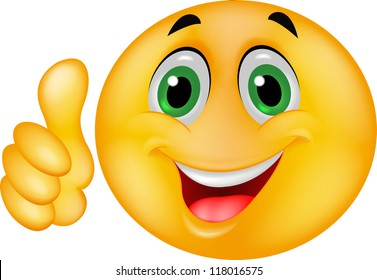

In [ ]:
%matplotlib inline
import imageio
import requests
import matplotlib.pyplot as plt
import IPython.display as dp


#Display the image from the web using an URI.
img ="https://www.shutterstock.com/image-illustration/happy-smiley-emoticon-face-260nw-118016575.jpg"
dp.Image(requests.get(img).content)


In [ ]:
#Read the image using imgaeio package's imread method and URI from web using
source_img = imageio.imread(img)

<ipython-input-16-bedb50cf5af3>:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  source_img = imageio.imread(img)


In [ ]:
# Make the image Black and White using the formula Y= 0.299*R + 0.587*G + 0.114*B i.e. applying greyscale
import numpy as np

def grayscaleimg(rgb):
  return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

gryscl_img = grayscaleimg(source_img)

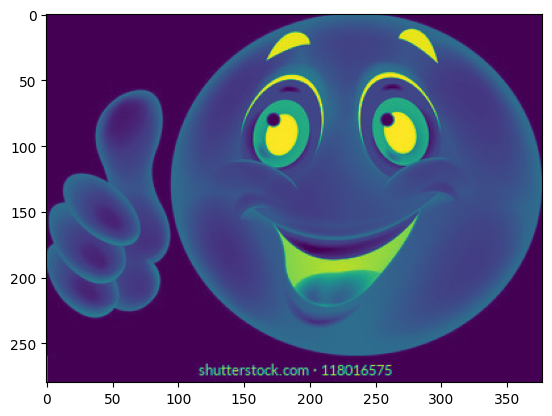

In [ ]:
#Invert the image by subtracting it from 255
inv_img = (255 - gryscl_img)
plt.imshow(inv_img)

<ipython-input-19-1c3f4d28fc51>:3: DeprecationWarning: Please import `gaussian_filter` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  blurred_img = scipy.ndimage.filters.gaussian_filter(inv_img, sigma=5)


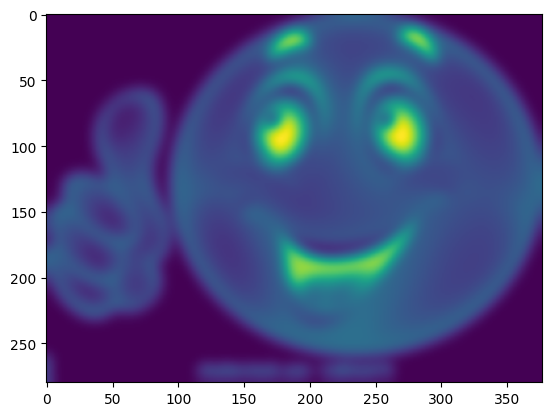

In [ ]:
#Blur the image using gaussian filter
import scipy.ndimage
blurred_img = scipy.ndimage.filters.gaussian_filter(inv_img, sigma=5)
plt.imshow(blurred_img)

In [ ]:
#Create function to perform dogding(belnding together greyscale and blurred image)
def dodging(blur_img, gryscl_img):
    resultant_dodge=blur_img*255/(255-gryscl_img)
    resultant_dodge[resultant_dodge>255]=255
    resultant_dodge[gryscl_img==255]=255
    return resultant_dodge.astype('uint8')

In [ ]:
#Generate the target image by applying the dodge
target_img= dodging(blurred_img, gryscl_img)

<ipython-input-20-290951472aef>:3: RuntimeWarning: divide by zero encountered in divide
  resultant_dodge=blur_img*255/(255-gryscl_img)
<ipython-input-20-290951472aef>:3: RuntimeWarning: invalid value encountered in divide
  resultant_dodge=blur_img*255/(255-gryscl_img)


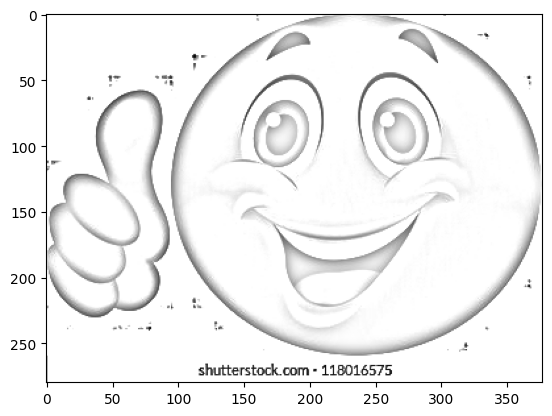

In [ ]:
#Didsplay the terget image
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(target_img , cmap = "gray")

In [ ]:
#Save the image
plt.imsave('target_image.png',target_img, cmap = 'gray',vmin=0, vmax = 255)